In [1]:
import sys
import re
import os

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from wordcloud import WordCloud

In [2]:
paths = []
data = []
songs = []
albums = []
mappings = {}
master_lyrics = []
master_lyricist = []

### This is where you will want to change your path name

In [3]:
dirName = "C:/Users/Sarah/Desktop/Portishead";

In [4]:
for (dirpath, dirnames, filenames) in os.walk(dirName):
    if filenames is not None:
        for file in filenames:
            if dirpath not in albums:
                albums.append(dirpath)
            if file not in songs:
                songs.append(file.strip(".txt"))
                paths.append(dirpath + """/""" + file)

In [5]:
for path in paths:
    lyricist = {}
    music = []
    lyric = []
    lyrics = []
    lyricist = None
    album = (str(re.findall(r'(\w*)/\w*.txt\Z', path)))
    songname = str(re.findall(r'(\w*).txt\Z', path))
    
    with open(path, "r") as ins:
        first_line = ins.readline()
        lyricist = str(re.findall(r'^\[Lyrics -([a-zA-Z\s]*);', first_line))
        music = str(re.findall(r'^\[Lyrics -[a-zA-Z\s]*; Music -*([\w*\s,]*)]', first_line))
        if lyricist is not None:
            next(ins)
        for line in ins:
            for word in line.split():
                if not ("""Chorus""") in line:
                    word = word.lower()
                    clean_word = word.strip("\n")
                    cleaner_word = clean_word.strip(" ")
                    lyrics.append(cleaner_word)
                    master_lyrics.append(cleaner_word)
                    
        mappings.update({
            album: {
                        songname: {
                            "lyricist": lyricist,
                            "lyrics": lyrics,
                            "music": music
                    }

                }
            
        })
        data.append(mappings)

In [6]:
words_to_remove = [
    "I", "she", "he", "the", "we", "they", "me", "you", "your", 
    "you're", "them", "their", "they're",  "him", "her", "it",
    "myself", "herself", "himself", "his", "hers", "per", "perself",
    "and", "i'll", "or", "[chorus]", "a", "[Lead]", "-", "[]", "Lead-"
               ]
def get_words_without_pronouns(master_lyrics):
    counts = []
    words = []
    big_nono_words = [x.upper() for x in words_to_remove]
    for word in master_lyrics:
        word = word.strip(",")
        word = word.upper()
        if word not in big_nono_words:
            words.append(word)
            counts.append(words.count(word) + 1)
            
        
    word_cnt_data = {}
    for i in xrange(len(words)):
        word_cnt_data.update({words[i]: counts[i]})
    lyrics_word_freq = zip(word_cnt_data.keys(), word_cnt_data.values())
    return lyrics_word_freq

In [7]:
lyrics_word_freq = get_words_without_pronouns(master_lyrics)
df = pd.DataFrame(lyrics_word_freq, columns=["Word", "Count"])
word_dataframe = df.sort_values(by='Count',  ascending=False)
top_20_words_in_all = word_dataframe.head(20)

### Plot the top 20 word occurances on a bar graph

In [8]:
def get_top_20_words(top_20_words_in_all):
    plt.rcdefaults()
    fig, ax = plt.subplots()
    word = top_20_words_in_all.get('Word')
    y_pos = np.arange(len(word))
    performance = top_20_words_in_all.get('Count')
    error = np.random.rand(len(word))
    ax.barh(y_pos, performance, xerr=error, align='center')
    ax.set_yticks(y_pos)
    ax.set_yticklabels(word)
    ax.invert_yaxis()
    ax.set_xlabel('Count')
    ax.set_title('Top 20 Word Occurances')
    plt.show()

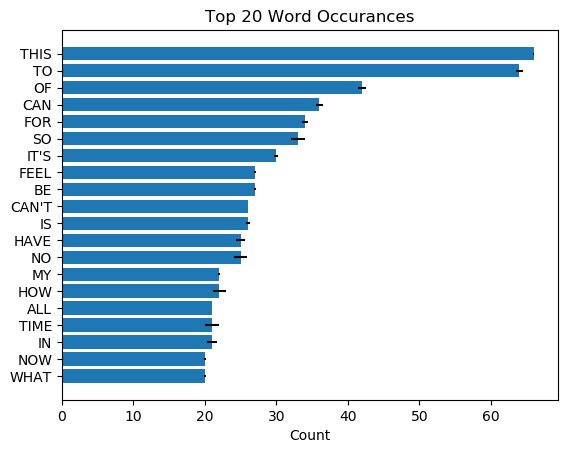

In [9]:
get_top_20_words(top_20_words_in_all)

### Create a WordCloud

#### Small text, lots of words

In [10]:
def tiny_text_wordcloud(master_lyrics):
    font_size = 20
    words = ""
    for word in master_lyrics:
        word = word + " "
        if word not in words:
            words +=str(word) + " "
    wordcloud = WordCloud(max_font_size=font_size).generate(words)
    return wordcloud

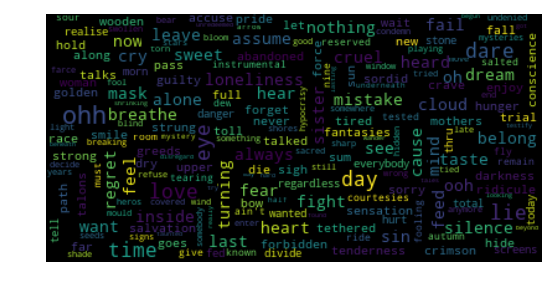

In [11]:
wordcloud = tiny_text_wordcloud(master_lyrics)

plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

#### Larger text, less words

In [12]:
def larger_text_wordcloud(master_lyrics):
    words = ""
    font_size = 40
    for word in master_lyrics:
        word = word + " "
        if word not in words:
            words +=str(word)

    wordcloud = WordCloud(max_font_size=font_size).generate(words)
    return wordcloud

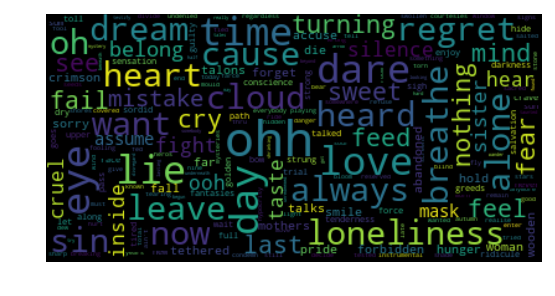

In [13]:
wordcloud = larger_text_wordcloud(master_lyrics)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()